In [1]:
# Import statements:
# openml: used to download and manipulate dataset
# pandas: used to manipulate/analyze dataframe/dataset, including using it for crosstab for chi-squared test
# numpy: helpful for math functions
# matplotlib: used to create plots to help analyze and demonstrate aspects about the dataset
# sklearn: used for encoders to change attributes from categorical strings to numerical and scale ranges
# scipy: used for hypothesis testing 

import openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder
from scipy.stats import ttest_ind, chi2_contingency

In [2]:
# Download " Supervised Classification on credit-g" dataset (https://www.openml.org/search?type=task&sort=runs&id=31)
# And split into a dataframe, the classifications for each datapoint, and whether or not each attribute is categorical
dataset = openml.datasets.get_dataset(31)
df, target, categorical_indicator, _ = dataset.get_data(target=dataset.default_target_attribute)
df.head()

C:\Users\nuggy\AppData\Local\Temp\ipykernel_30016\3876843245.py:3: FutureWarning: Starting from Version 0.15 `download_data`, `download_qualities`, and `download_features_meta_data` will all be ``False`` instead of ``True`` by default to enable lazy loading. To disable this message until version 0.15 explicitly set `download_data`, `download_qualities`, and `download_features_meta_data` to a bool while calling `get_dataset`.
  dataset = openml.datasets.get_dataset(31)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   uint8   
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   uint8   
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   uint8   
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   uint8   
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [4]:
# Seperate the columns of the dataset into categorical and continuous subsets.
categorical_features = [i for i in categorical_indicator*df.columns if i != '']
categorical_features

['checking_status',
 'credit_history',
 'purpose',
 'savings_status',
 'employment',
 'personal_status',
 'other_parties',
 'property_magnitude',
 'other_payment_plans',
 'housing',
 'job',
 'own_telephone',
 'foreign_worker']

In [5]:
# LabelEncoder converts "target" from an array of "good" and "bad" to an array of 1 and 0 
# so it can more easily be analyzed and compared to other variables. 
target = LabelEncoder().fit_transform(target)
df['class'] = target
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,1
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,0
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,1
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,1
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,0


# Hypothesis Test #1: Does the type of job have a significant effect on the type of credit risk?

H<sub>0</sub>: The type of job has no significant effect on the type of credit risk.

H<sub>a</sub>: The type of job has a significant effect on the type of credit risk.

In [6]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(df['job'], df['class']))
p

0.5965815918843433

C:\Users\nuggy\AppData\Local\Temp\ipykernel_30016\1207806485.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blue_bar = list(df[df['class'] == 1].groupby('job').size())
C:\Users\nuggy\AppData\Local\Temp\ipykernel_30016\1207806485.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orange_bar = list(df[df['class'] == 0].groupby('job').size())


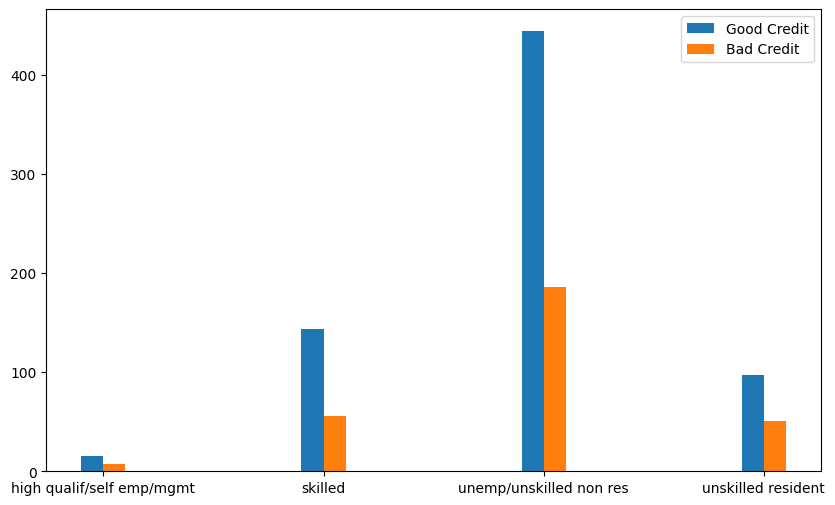

In [7]:
blue_bar = list(df[df['class'] == 1].groupby('job').size())
orange_bar = list(df[df['class'] == 0].groupby('job').size())
fig, ax = plt.subplots(figsize=(10, 6))
ind = np.arange(4)
width = 0.1       
plt.bar(ind, blue_bar , 0.1, label='Good Credit')
plt.bar(ind + 0.1, orange_bar, width, label='Bad Credit')
plt.xticks(ind + 0.05, sorted(list(df['job'].unique())))
plt.legend(loc='best')
plt.show()

## Conclusion
Since the p-value of 0.597 is greater than the alpha threshold of 0.05, we fail to reject the null hypothesis that the type of job has no significant effect on the type of credit risk.

While the chi-squared test can compare two sets of categorical data, other tests, like the t-test cannot. To use these tests, we will convert the categorical data (leaving out specific features which we confirm with manual boxes) by using an OrdinalEncoder, which takes in an array of categorical data and converts it to an array of ordinal integers, with each category getting a discrete integer. The continuous features can be left as they are.

In [8]:
feature_maps = {
    'checking_status': {'no checking': 0, '<0': -1, '0<=X<200': 1, '>=200': 2},
    'credit_history': {'no credits/all paid': 2, 'all paid': 1, 'existing paid': 0, 'critical/other existing credit': -1, 'delayed previously': -2},
    'savings_status': {'no known savings': 0, '<100': -1, '100<=X<500': 1, '500<=X<1000': 2, '>=1000': 3},
    'employment': {'unemployed': -1, '<1': 0, '1<=X<4': 1, '4<=X<7': 2, '>=7': 3},
    'job': {'unemp/unskilled non res': 0, 'high qualif/self emp/mgmt': 1, 'unskilled resident': 2, 'skilled': 3},
}
for col in feature_maps:
    df[col] = df[col].map(feature_maps[col]).astype('int')

In [9]:
other_categorical_features = list(set(categorical_features) - set(feature_maps.keys()))
for i in other_categorical_features:
    df[i] = OrdinalEncoder().fit_transform(df[i].values.reshape(-1, 1)).astype('int')
categorical_features += ['installment_commitment', 'residence_since', 'existing_credits', 'num_dependents']
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,-1,6,-1,6,1169.0,0,3,4,3,2,...,3,67,1,1,2,3,1,1,1,1
1,1,48,0,6,5951.0,-1,1,2,0,2,...,3,22,1,1,1,3,1,0,1,0
2,0,12,-1,2,2096.0,-1,2,2,3,2,...,3,49,1,1,1,2,2,0,1,1
3,-1,42,0,3,7882.0,-1,2,2,3,1,...,1,45,1,0,1,3,2,0,1,1
4,-1,24,-2,4,4870.0,-1,1,3,3,2,...,2,53,1,0,2,3,2,0,1,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   int32  
 1   duration                1000 non-null   uint8  
 2   credit_history          1000 non-null   int32  
 3   purpose                 1000 non-null   int32  
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   int32  
 6   employment              1000 non-null   int32  
 7   installment_commitment  1000 non-null   uint8  
 8   personal_status         1000 non-null   int32  
 9   other_parties           1000 non-null   int32  
 10  residence_since         1000 non-null   uint8  
 11  property_magnitude      1000 non-null   int32  
 12  age                     1000 non-null   uint8  
 13  other_payment_plans     1000 non-null   int32  
 14  housing                 1000 non-null   i

In [11]:
continuous_features = [i for i in df.columns if i not in categorical_features]
continuous_features.remove('class')
continuous_features

['duration', 'credit_amount', 'age']

# Hypothesis Test #2: Is the average credit amount lower for good credit risks vs bad credit risks?

Let $\sigma$<sub>g</sub> be the mean credit amount for those who are classified as a good credit risk and let $\sigma$<sub>b</sub> be the mean credit amount for those who are classified as a bad credit risk.

H<sub>0</sub>: $\sigma$<sub>g</sub> = $\sigma$<sub>b</sub>

H<sub>a</sub>: $\sigma$<sub>g</sub> < $\sigma$<sub>b</sub>

In [12]:
good_credit_amount = df[df['class'] == 1]['credit_amount']
bad_credit_amount = df[df['class'] == 0]['credit_amount']
t_statistic, p_value = ttest_ind(good_credit_amount, bad_credit_amount, alternative='less')
p_value


4.398786186764447e-07

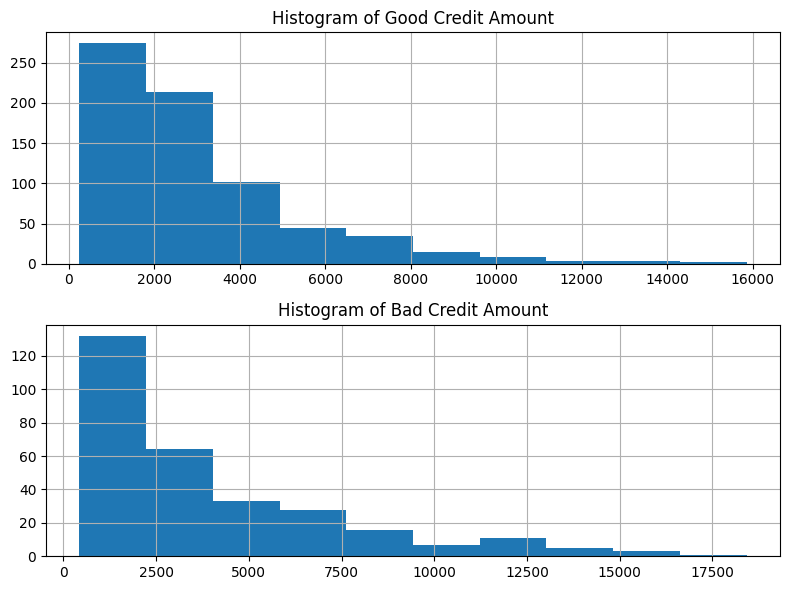

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
good_credit_amount.hist(ax=axes[0])
axes[0].set_title('Histogram of Good Credit Amount')
bad_credit_amount.hist(ax=axes[1])
axes[1].set_title('Histogram of Bad Credit Amount')
plt.tight_layout()
plt.show()


## Conclusion
Since the p-value of 4.398e-07 is less than the alpha threshold of 0.05, we have sufficient evidence to reject the null hypothesis that the mean credit amount is the same between those that are good credit risks and bad credit risks.

# Hypothesis Test #3: Is the average duration lower for good credit risks vs bad credit risks?

Let $\sigma$<sub>g</sub> be the mean duration for those who are classified as a good credit risk and let $\sigma$<sub>b</sub> be the mean duration for those who are classified as a bad credit risk.

H<sub>0</sub>: $\sigma$<sub>g</sub> = $\sigma$<sub>b</sub>

H<sub>a</sub>: $\sigma$<sub>g</sub> < $\sigma$<sub>b</sub>

In [14]:
good_duration = df[df['class'] == 1]['duration']
bad_duration = df[df['class'] == 0]['duration']
t_statistic, p_value = ttest_ind(good_duration, bad_duration, alternative='less')
p_value

3.2440249385921742e-12

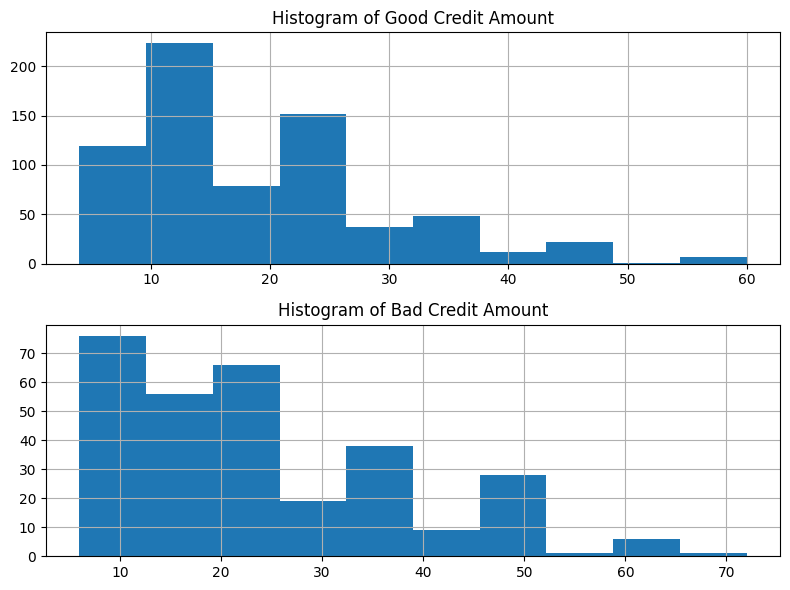

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))
good_duration.hist(ax=axes[0])
axes[0].set_title('Histogram of Good Credit Amount')
bad_duration.hist(ax=axes[1])
axes[1].set_title('Histogram of Bad Credit Amount')
plt.tight_layout()
plt.show()

## Conclusion
Since the p-value of 3.244e-12 is less than the alpha threshold of 0.05, we have sufficient evidence to reject the null hypothesis that the mean duration is the same between those that are good credit risks and bad credit risks.

In [16]:
df['credit_amount'] = MinMaxScaler().fit_transform(df['credit_amount'].values.reshape(-1, 1))